## Import Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats

## Read Data

In [3]:
stock_ntr = pd.read_csv('../NTR.csv')
stock_ntr

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-02,46.209999,46.990002,45.855000,46.259998,40.076595,1289100
1,2019-01-03,46.000000,46.099998,44.882999,45.049999,39.028339,1158800
2,2019-01-04,45.950001,47.180000,45.880001,47.130001,40.830315,1538500
3,2019-01-07,47.310001,48.110001,46.840000,47.740002,41.358772,954700
4,2019-01-08,48.709999,49.480000,48.520000,49.209999,42.632286,1921800
...,...,...,...,...,...,...,...
1114,2023-06-06,53.000000,57.294998,52.820000,57.220001,57.220001,6397900
1115,2023-06-07,57.610001,59.750000,57.520000,59.340000,59.340000,2925500
1116,2023-06-08,59.400002,60.080002,57.910000,58.939999,58.939999,2828400
1117,2023-06-09,58.959999,59.349998,58.290001,58.790001,58.790001,1686600


## Analyst

### Describe

In [4]:
stock_ntr.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1.119000e+03
mean,60.509250,61.375748,59.622357,60.495666,57.287847,2.081001e+06
std,18.418403,18.830872,18.005372,18.427809,19.364442,1.215053e+06
min,24.820000,26.750999,23.848000,25.100000,22.519356,4.274000e+05
25%,48.509998,48.952500,48.125000,48.495001,43.101965,1.296700e+06
50%,55.529999,55.950001,54.680000,55.349998,52.488567,1.757700e+06
75%,73.509998,74.610001,72.399998,73.380001,72.472850,2.568850e+06
max,113.760002,117.250000,111.910004,114.500000,111.642052,1.133740e+07


In [5]:
# Skewness
skewness = stats.skew(stock_ntr['Close'])
print("Skewness: ", skewness)

Skewness:  0.5661965864200024


In [6]:
# Kurtosis
kurtosis = stats.kurtosis(stock_ntr['Close'])
print("Kurtosis: ", kurtosis)


Kurtosis:  -0.2825734247284868


### Visualization

#### Histogram

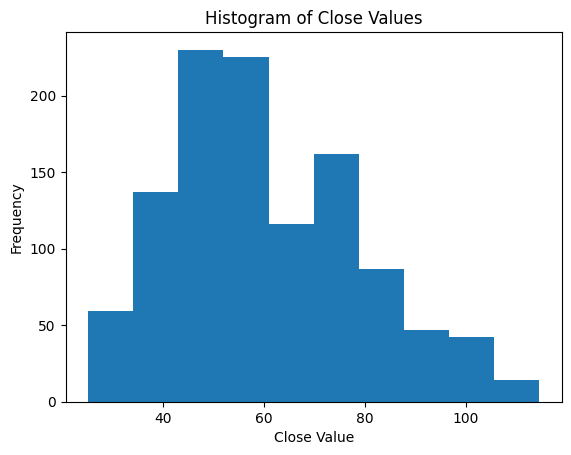

In [7]:
plt.hist(stock_ntr['Close'])

plt.title("Histogram of Close Values")
plt.xlabel("Close Value")
plt.ylabel("Frequency")

plt.show()

#### Boxplot

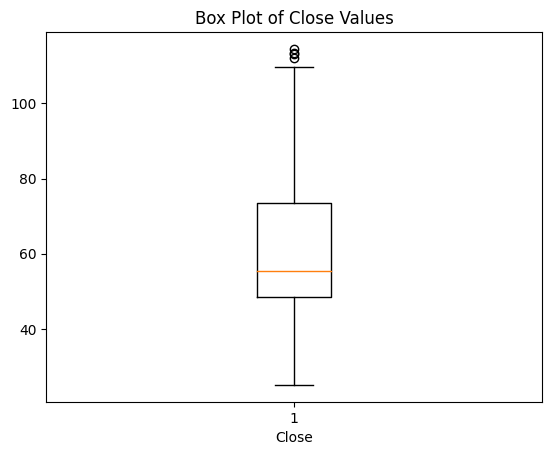

In [8]:
plt.boxplot(stock_ntr['Close'])

plt.title("Box Plot of Close Values")
plt.xlabel("Close")

plt.show()

#### Initial Close Values

In [9]:
# Convert the 'Date' column to datetime format
stock_ntr['Date'] = pd.to_datetime(stock_ntr['Date'])

# Set the 'Date' column as the index value
stock_ntr = stock_ntr.set_index(pd.DatetimeIndex(stock_ntr['Date'].values))

# Delete Date from Dataframe
stock_ntr = stock_ntr.drop('Date', axis=1)

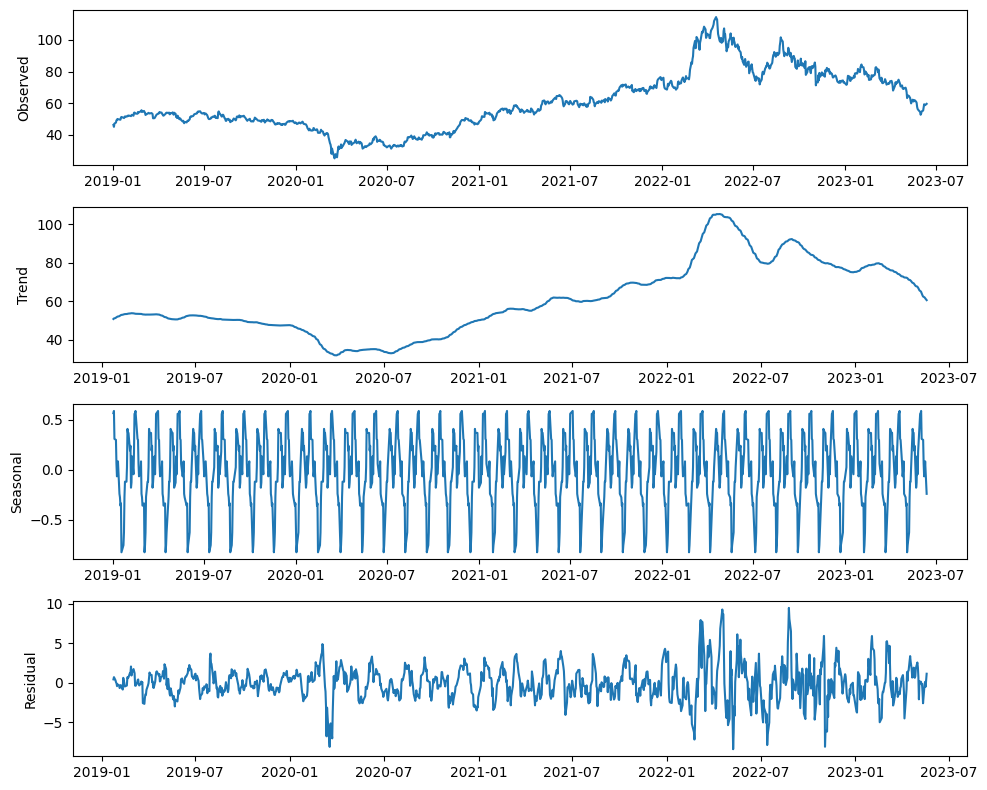

In [10]:
decomposition = sm.tsa.seasonal_decompose(stock_ntr['Close'], model='add', period=30)

# Plotting the components
fig, ax = plt.subplots(4,1, figsize=(10,8))
ax[0].plot(decomposition.observed)
ax[0].set_ylabel('Observed')
ax[1].plot(decomposition.trend)
ax[1].set_ylabel('Trend')
ax[2].plot(decomposition.seasonal)
ax[2].set_ylabel('Seasonal')
ax[3].plot(decomposition.resid)
ax[3].set_ylabel('Residual')
plt.tight_layout()
plt.show()

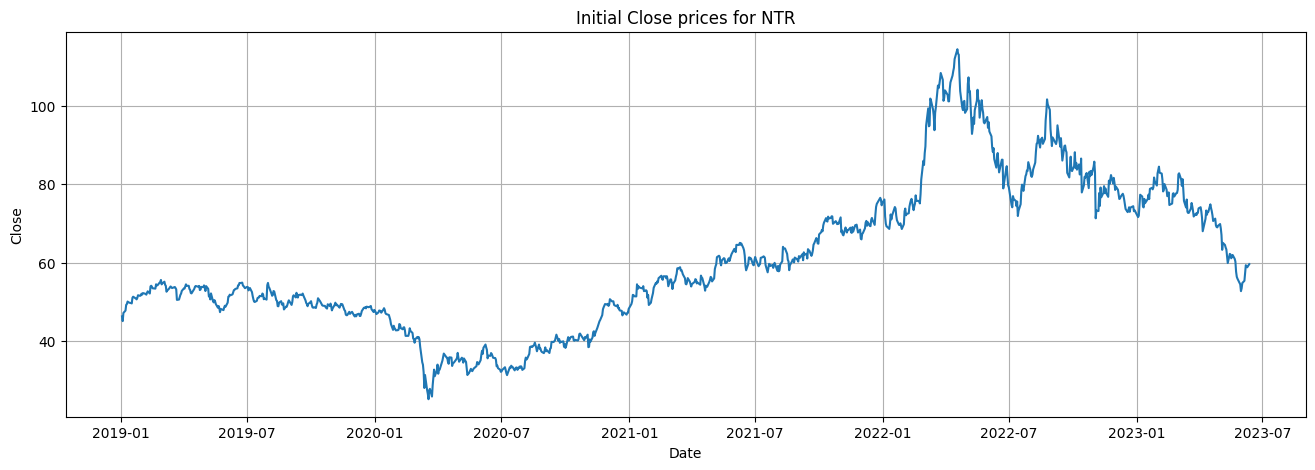

In [11]:
plt.figure(figsize=(16,5))

plt.plot(stock_ntr.index, stock_ntr['Close'])

plt.xlabel('Date')
plt.ylabel('Close')
plt.title('Initial Close prices for NTR')
plt.grid()
plt.show()